In [1]:
import cv2
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io
from skimage import transform
from skimage.transform import rotate 

warnings.filterwarnings('ignore')

In [2]:
# establish a folder named LAB5
path = "LAB5"
if not os.path.isdir(path):
    os.mkdir(path)

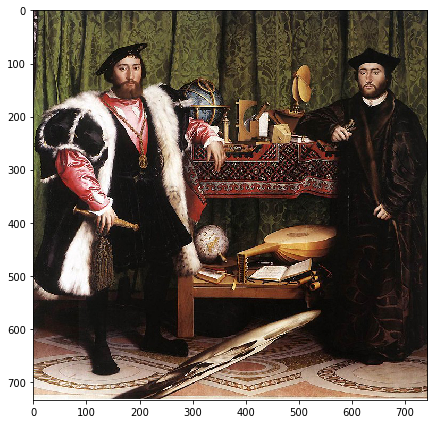

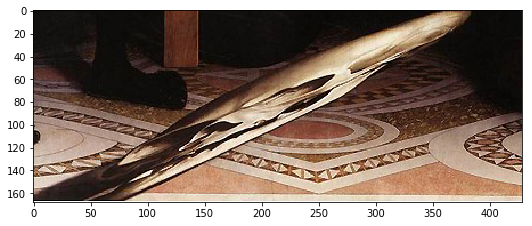

In [3]:
# show the RGB picture
imgRGB = io.imread('ambassadors.png')
skull = imgRGB[566:743,157:586]

plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)
io.imsave('LAB5/lakeRGB.png', imgRGB)

plt.figure(figsize=(7.5,5)) 
io.imshow(skull)
io.imsave('LAB5/skullRGB.png', skull)

In [4]:
def unwarp(img, src, dst, testing, angle):
    h, w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        image_rotated = rotate(warped, angle)  # rotate
        
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize = 20)
        ax2.imshow(cv2.flip(image_rotated, 1))
        ax2.set_title('Distortion Correction Result', fontsize = 20)
        plt.show()
    else:
        return warped, M

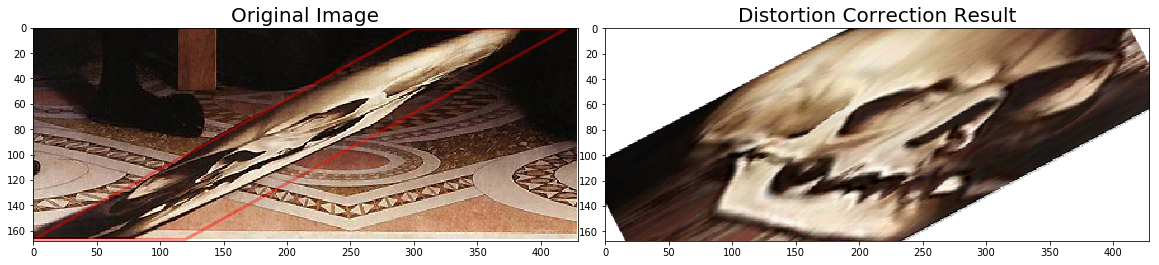

In [5]:
pointLoc    = np.float32([(300,1),(420,1),(0,167),(120,167)])
pointLocNEW = np.float32([(0,1),(420,1),(0,167),(397,167)])

unwarp(skull, pointLoc, pointLocNEW, True, -28)